# Movies and TV Shows Insights

### Introduction

### Importing Libraries

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading & Overview

In [506]:
df = pd.read_csv("../data/raw/netflix_titles.csv", encoding="unicode_escape")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [507]:
rows, columns = df.shape
print('Table rows is: ', rows)
print('Table columns is: ', columns)

Table rows is:  8807
Table columns is:  12


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [509]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Feature Engineering

In [520]:
df['year_added'] = df['date_added'].dt.year.astype('Int64')
df['month_added'] = df['date_added'].dt.month.astype('Int64')
df['day_added'] = df['date_added'].dt.day.astype('Int64')

In [521]:
df['genre_list'] = df['listed_in'].str.split(',')

df = df.explode('genre_list')

In [522]:
df['countries'] = df['country'].str.split(',')

df = df.explode('countries')

### Data Cleaning

In [510]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [511]:
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('NR')

In [513]:
df = df.dropna(subset=['duration'])

In [528]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      20
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      20
month_added     20
day_added       20
genre_list       0
countries        0
dtype: int64

In [570]:
df['genre_list'] = df['genre_list'].str.replace(r'^(TV |Movie[s]? )|(\s+TV Shows|\s+Movies)$', '', regex=True).str.strip()

In [571]:
df['genre_list'] = df['genre_list'].str.replace(r'^TV\s+', '', regex=True).str.strip()

In [516]:
df['date_added'] = df['date_added'].str.strip()

In [517]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [518]:
df['listed_in'] = df['listed_in'].str.strip()

In [519]:
df['country'] = df['country'].str.strip(' ,')

In [523]:
df['countries'] = df['countries'].str.strip()

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23746 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       23746 non-null  object        
 1   type          23746 non-null  object        
 2   title         23746 non-null  object        
 3   director      23746 non-null  object        
 4   cast          23746 non-null  object        
 5   country       23746 non-null  object        
 6   date_added    23726 non-null  datetime64[ns]
 7   release_year  23746 non-null  int64         
 8   rating        23746 non-null  object        
 9   duration      23746 non-null  object        
 10  listed_in     23746 non-null  object        
 11  description   23746 non-null  object        
 12  year_added    23726 non-null  Int64         
 13  month_added   23726 non-null  Int64         
 14  day_added     23726 non-null  Int64         
 15  genre_list    23746 non-null  object      

In [525]:
df_clean = df[df['countries'] != 'Unknown']

In [526]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22024 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       22024 non-null  object        
 1   type          22024 non-null  object        
 2   title         22024 non-null  object        
 3   director      22024 non-null  object        
 4   cast          22024 non-null  object        
 5   country       22024 non-null  object        
 6   date_added    22005 non-null  datetime64[ns]
 7   release_year  22024 non-null  int64         
 8   rating        22024 non-null  object        
 9   duration      22024 non-null  object        
 10  listed_in     22024 non-null  object        
 11  description   22024 non-null  object        
 12  year_added    22005 non-null  Int64         
 13  month_added   22005 non-null  Int64         
 14  day_added     22005 non-null  Int64         
 15  genre_list    22024 non-null  object      

### Exploratory Data Analysis (EDA)

#### Content Type Analysis

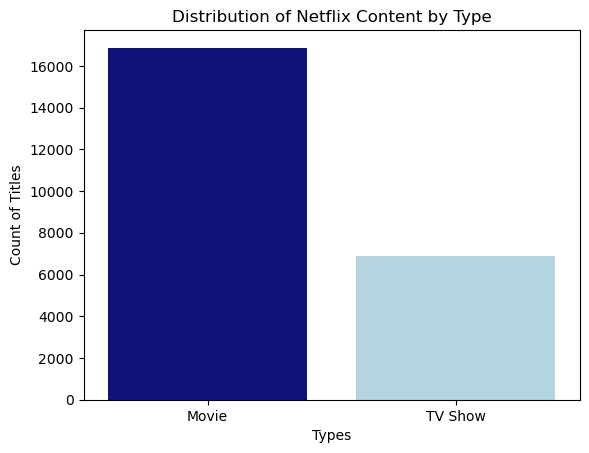

In [476]:
type_palette = {'Movie': 'darkblue', 'TV Show': 'lightblue'}

sns.countplot(data=df, x='type', hue='type', palette=type_palette)
plt.ylabel('Count of Titles')
plt.xlabel('Types')
plt.title('Distribution of Netflix Content by Type')
plt.show()

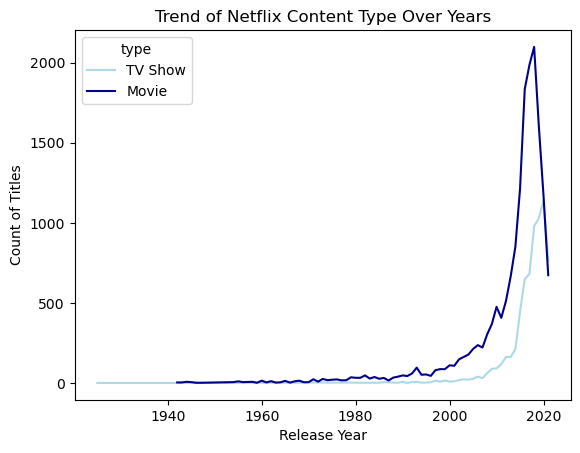

In [475]:
yearly_type_counts = df.groupby(['release_year', 'type'])['title'].count().reset_index()

sns.lineplot(data=yearly_type_counts, x='release_year', y='title', hue='type', palette=type_palette)
plt.xlabel('Release Year')
plt.ylabel('Count of Titles')
plt.title('Trend of Netflix Content Type Over Years')
plt.show()

#### Yearly Trends

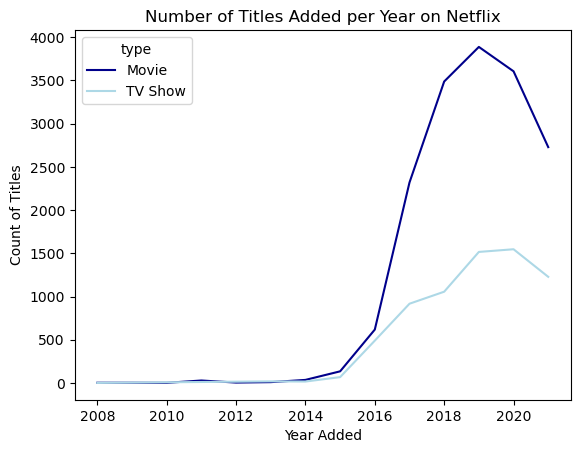

In [474]:
yearly_trends = df.groupby(['year_added', 'type'])['title'].count().reset_index()

sns.lineplot(data=yearly_trends, x='year_added', y='title', hue='type', palette=type_palette)
plt.xlabel('Year Added')
plt.ylabel('Count of Titles')
plt.title('Number of Titles Added per Year on Netflix')
plt.show()

#### Genre/Category Analysis

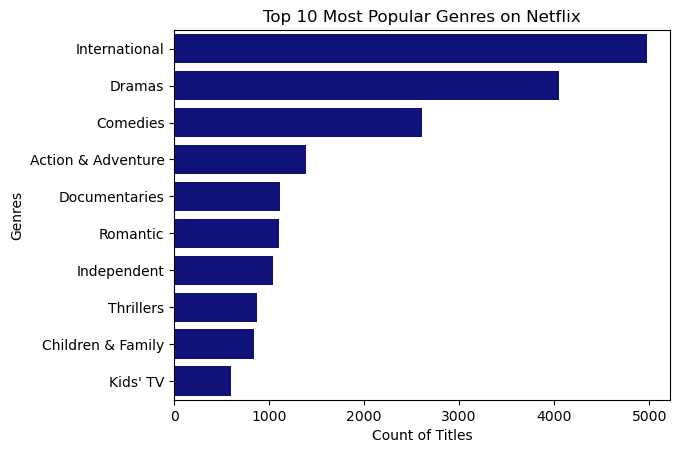

In [573]:
ten_most_pop_genre = df.groupby('genre_list')['title'].count().reset_index().sort_values(by='title', ascending=False)[:10]

sns.barplot(data=ten_most_pop_genre, x='title', y='genre_list', color='darkblue')
plt.xlabel('Count of Titles')
plt.ylabel('Genres')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.show()

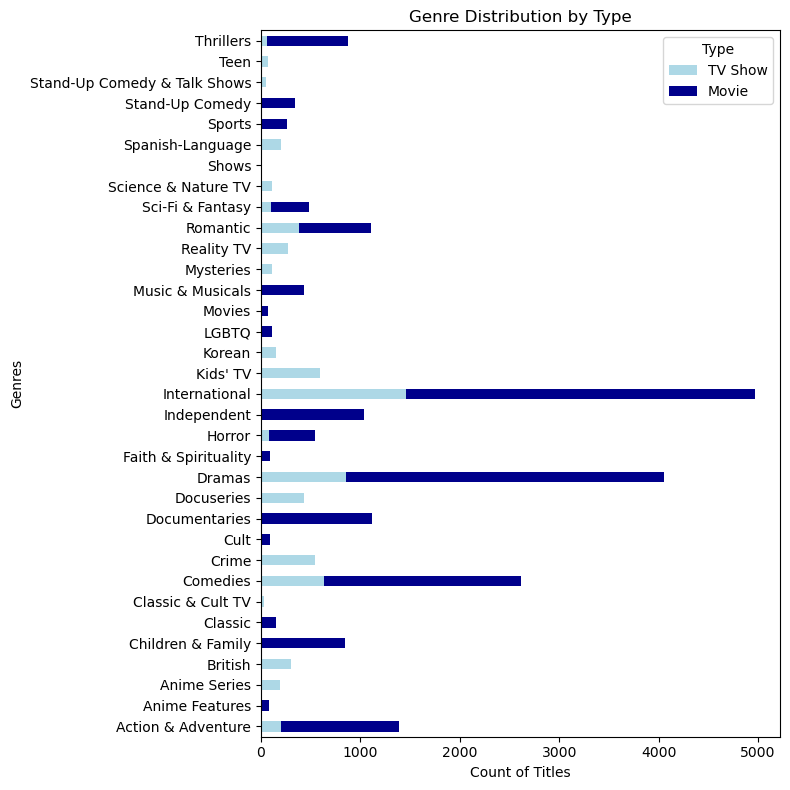

In [572]:
genre_by_type = df.groupby(['genre_list', 'type'])['title'].count().reset_index().sort_values(by='title', ascending=False)
genre_by_type_expanded = genre_by_type.pivot(index='genre_list', columns='type', values='title')
genre_by_type_expanded = genre_by_type_expanded[['TV Show', 'Movie']]

genre_by_type_expanded.plot(kind='barh', stacked=True, color=type_palette, figsize=(8,8))
plt.xlabel('Count of Titles')
plt.ylabel('Genres')
plt.title('Genre Distribution by Type')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

#### Country Analysis

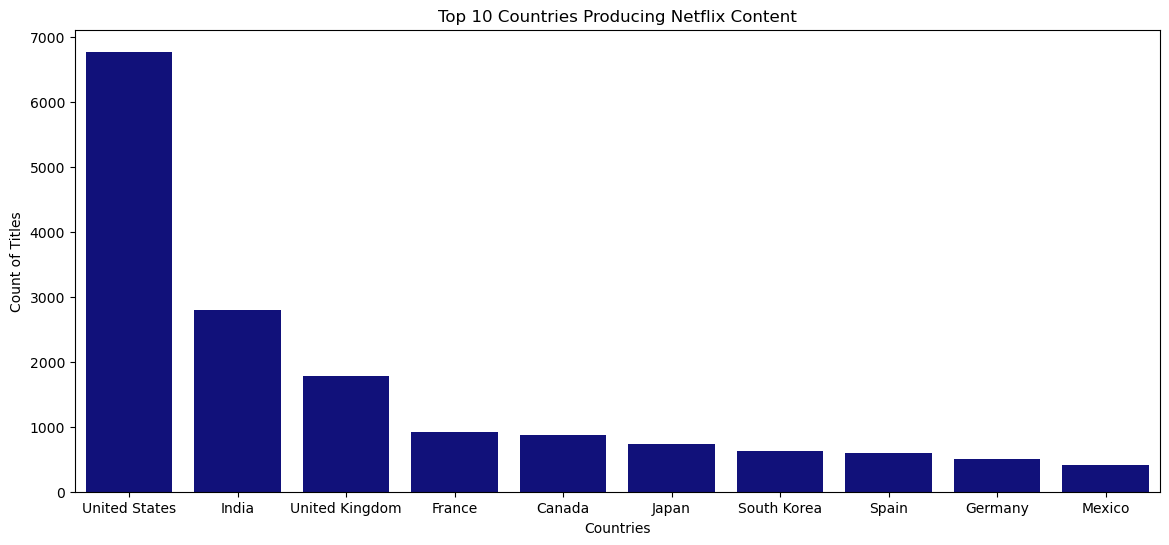

In [574]:
grouped_country = df_clean.groupby('countries')['title'].count().reset_index().sort_values(by='title', ascending=False)[:10]

plt.figure(figsize=(14,6))
sns.barplot(data=grouped_country, x='countries', y='title', color='darkblue')
plt.xlabel('Countries')
plt.ylabel('Count of Titles')
plt.title('Top 10 Countries Producing Netflix Content')
plt.show()

#### Rating Analysis

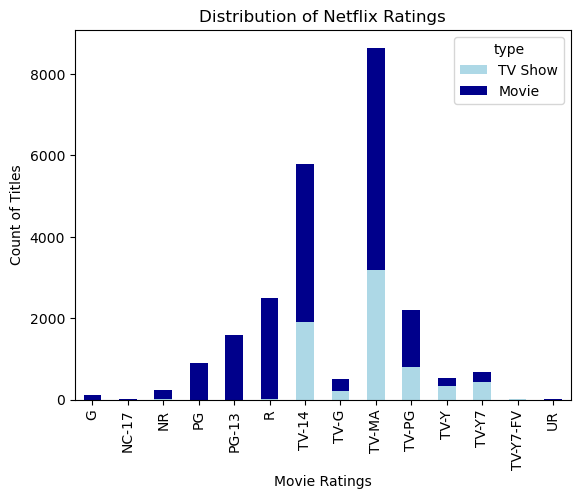

In [560]:
grouped_rating = df.groupby(['rating', 'type'])['title'].count().reset_index()
grouped_rating = grouped_rating.pivot(index='rating', columns='type', values='title')
grouped_rating = grouped_rating[['TV Show', 'Movie']]
grouped_rating['TV Show'] = grouped_rating['TV Show'].fillna(0)

grouped_rating.plot(kind='bar', stacked=True, color=type_palette)
plt.xlabel('Movie Ratings')
plt.ylabel('Count of Titles')
plt.title('Distribution of Netflix Ratings')
plt.show()

#### Duration Analysis

In [696]:
df_movies = df[df['type'] == 'Movie']
df_movies.loc[:, 'duration'] = df_movies['duration'].str.replace(r'\D+', '', regex=True).str.strip()
df_movies['duration'] = pd.to_numeric(df_movies['duration'])

/var/folders/ns/3xf8g7ls25sf8ldwjd_4v74m0000gn/T/ipykernel_44254/1875308065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = pd.to_numeric(df_movies['duration'])


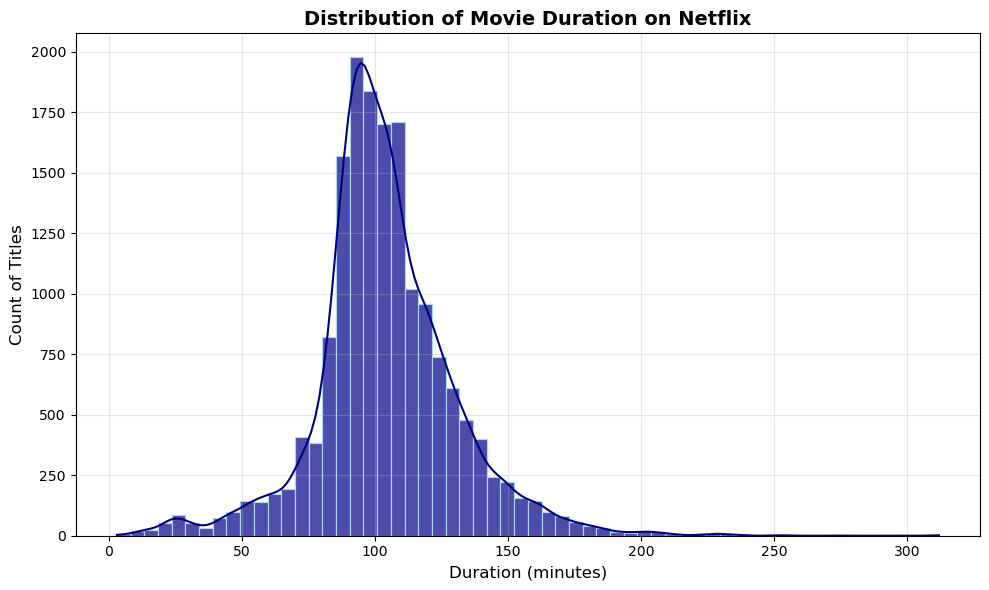

In [713]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_movies, x='duration', bins=60, kde=True, color='darkblue', edgecolor='lightblue', alpha=0.7)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Count of Titles', fontsize=12)
plt.title('Distribution of Movie Duration on Netflix', fontsize=14, weight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [725]:
df_shows = df[df['type'] == 'TV Show']
df_shows.loc[:, 'duration'] = df_shows['duration'].str.replace(r'\D+', '', regex=True).str.strip()
df_shows['duration'] = pd.to_numeric(df_shows['duration'])

/var/folders/ns/3xf8g7ls25sf8ldwjd_4v74m0000gn/T/ipykernel_44254/473899732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['duration'] = pd.to_numeric(df_shows['duration'])


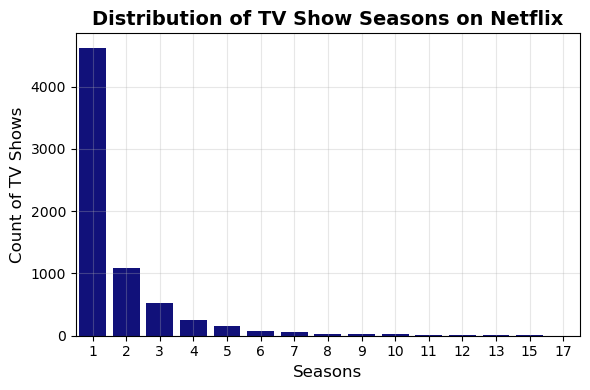

In [730]:
plt.figure(figsize=(6, 4))

sns.countplot(data=df_shows, x='duration', color='darkblue')
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Count of TV Shows', fontsize=12)
plt.title('Distribution of TV Show Seasons on Netflix', fontsize=14, weight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Director Analysis

### Month Added Analysis

### Text Analysis

### Correlation & Cross-Features Patterns

### Summary

### Acknowledgment